In [1]:
# from scripts.data.phylogeny import Phylogeny
from scripts.data.phylogeny import PhylogenyCUB

In [2]:
# phylogeny = Phylogeny("/home/elhamod/data/Fish")
phylogeny = PhylogenyCUB('/home/elhamod/projects/phylonn/analysis/phylotree') 

/home/elhamod/projects/phylonn/analysis/phylotree/1_tree-consensus-Hacket-AllSpecies-cub-names.phy
True


In [3]:
tree = phylogeny.tree

In [4]:
distances_from_root = []
hops_fro_root = []
r = tree.get_tree_root()
for n in tree.traverse():
    distances_from_root.append(tree.get_distance(n, r))
    hops_fro_root.append(tree.get_distance(n, r, topology_only=True))
    
distances_from_root = [x/max(distances_from_root) for x in distances_from_root] # 1- ?

Matplotlib created a temporary config/cache directory at /localscratch/1099992/matplotlib-oehgpq0f because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


<BarContainer object of 30 artists>

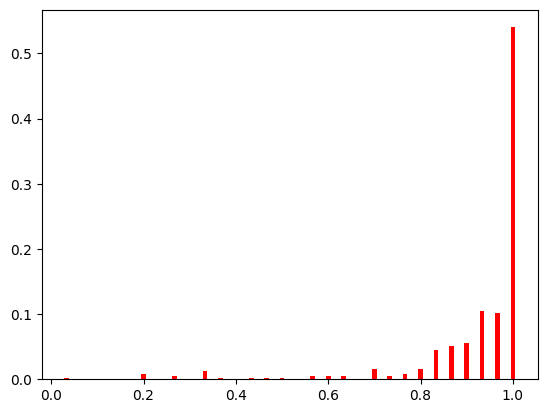

In [5]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
%matplotlib inline

count1, bins_count1 = np.histogram(distances_from_root, bins=30)
pdf = count1 / sum(count1)
plt.bar(bins_count1[1:], pdf, color="red", label="PDF", width = 0.01)

In [6]:
# yticks = [0.25, 0.5, 0.75]
yticks = [1/15, 3/15, 7/15] # each band should double number of nodes. [x, 2x, 4x, 8x]

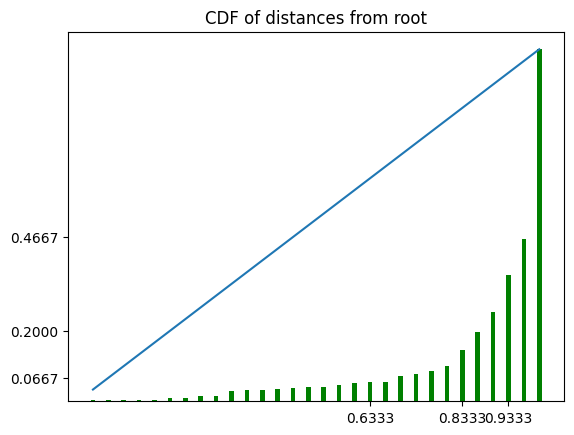

In [7]:
cdf = np.cumsum(pdf)

plt.bar(bins_count1[1:], cdf, color="green", label="CDF", width = 0.01)
plt.plot(bins_count1[1:], bins_count1[1:])

plt.yticks(yticks)

xticks = []
j = 0
for indx, i in enumerate(bins_count1[1:]):
    if cdf[indx] > yticks[j]:
        xtick = bins_count1[indx-1]
        xticks.append(xtick)
        j = j+1
        if j == 3: break
plt.xticks(xticks)        

plt.title("CDF of distances from root")

plt.show()



In [8]:
print('The phylo quantizations should be at', xticks)

The phylo quantizations should be at [0.6333333333333333, 0.8333333333333334, 0.9333333333333333]


In [9]:
#### Scratches:

# plt.hist(distances_from_root, density=True, bins=30, cumulative=True) 
# plt.ylabel('CDF')
# plt.xlabel('Distance');

# from ete3 import Tree
# def search_by_size(node, size):
#     "Finds nodes with a given number of leaves"
#     matches = []
#     for n in node.traverse():
#        if len(n) == size:
#           matches.append(n)
#     return matches

# t = Tree()
# t.populate(40)
# # returns nodes containing 6 leaves
# search_by_size(t, size=6)

# hops_fro_root = [x/max(hops_fro_root) for x in hops_fro_root]